In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [20]:
data = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/log/csv/rl_4_20210201-202334_traj.csv")

In [21]:
print(data)
num = 4
new_data = [None]*num
for i in range(num):
    new_data[i] = data[data["ID"] == i]
    new_data[i] = new_data[i][["time","ID", "x", "y"]]


    time  ID     x     y
0    0.1   0  1.61  1.17
1    0.1   1 -1.62 -1.17
2    0.1   2 -1.17  1.62
3    0.1   3  1.17 -1.61
4    0.7   0  1.52  1.11
5    0.7   1 -1.53 -1.10
6    0.7   2 -1.10  1.55
7    0.7   3  1.11 -1.52
8    1.2   0  1.37  0.95
9    1.2   1 -1.42 -0.92
10   1.2   2 -0.92  1.45
11   1.2   3  0.97 -1.34
12   1.8   0  1.28  0.71
13   1.8   1 -1.39 -0.63
14   1.8   2 -0.65  1.37
15   1.8   3  0.67 -1.20
16   2.3   0  1.14  0.45
17   2.3   1 -1.29 -0.37
18   2.3   2 -0.40  1.22
19   2.3   3  0.41 -1.07
20   2.9   0  0.97  0.16
21   2.9   1 -1.09 -0.17
22   2.9   2 -0.19  1.06
23   2.9   3  0.19 -0.87
24   3.4   0  0.80 -0.06
25   3.4   1 -0.89  0.03
26   3.4   2  0.00  0.89
27   3.4   3 -0.04 -0.68
28   4.0   0  0.61 -0.27
29   4.0   1 -0.69  0.21
30   4.0   2  0.17  0.71
31   4.0   3 -0.25 -0.50
32   4.5   0  0.39 -0.43
33   4.5   1 -0.51  0.38
34   4.5   2  0.32  0.50
35   4.5   3 -0.48 -0.30
36   5.0   0  0.18 -0.60
37   5.0   1 -0.32  0.58
38   5.0   2  0.54  0.31


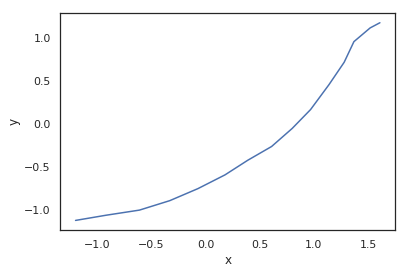

In [22]:
sns.set(style="white")
traj_plot = sns.lineplot(data=new_data[0], x="x", y="y")

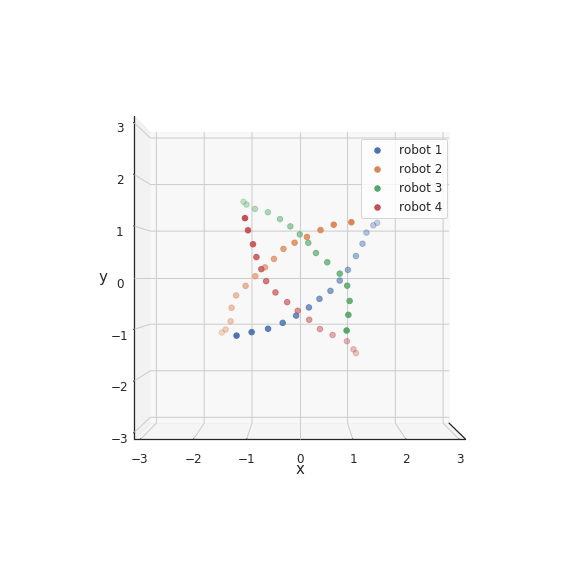

In [23]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
x = new_data[0]['time']
y = new_data[0]['x']
z = new_data[0]['y']

x2 = new_data[1]['time']
y2 = new_data[1]['x']
z2 = new_data[1]['y']

x3 = new_data[2]['time']
y3 = new_data[2]['x']
z3 = new_data[2]['y']

x4 = new_data[3]['time']
y4 = new_data[3]['x']
z4 = new_data[3]['y']




#ax.set_xlabel("time")
ax.set_ylabel("x", fontsize = 15)
ax.set_zlabel("y", fontsize = 15)

fig.set_figheight(10)
fig.set_figwidth(10)


ax.scatter(x, y, z, label="robot 1", s=30)
ax.scatter(x2, y2, z2, label="robot 2", s=30)
ax.scatter(x3, y3, z3, label="robot 3", s=30)
ax.scatter(x4, y4, z4, label="robot 4", s=30)

ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
#ax.set_top_view()
ax.view_init(0,0)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.780), fontsize=12)

#plt.gca().axes.get_xaxis().set_visible(False)
plt.xticks([])
plt.show()

In [24]:
from math import *
# Calculate the distance of trajectories
x_arr = [None]*num
y_arr = [None]*num
x = [None]*num
y = [None]*num
traj_dist = [0.0]*num
for i in range(num):
    x_arr[i] = new_data[i]["x"]
    y_arr[i] = new_data[i]["y"]
    x[i] = x_arr[i].to_numpy()
    y[i] = y_arr[i].to_numpy()
#print(x)
#print(y)
#print(len(new_data[0])-1)
for i in range(len(new_data[0])-1):
    for j in range(num):
        #print(x_arr[j])
        traj_dist[j] += sqrt((x[j][i]-x[j][i+1])**2+(y[j][i]-y[j][i+1])**2)
print(traj_dist)



[3.813748883928353, 3.6602610299046434, 3.6805988929341416, 3.716758867081758]
